In [17]:
import yfinance as yf
import pandas as pd
import os

empty_series = pd.Series(dtype='float64')

In [18]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [19]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-29 00:00:00-05:00,4892.950195,4929.310059,4887.399902,4927.930176,3525160000,0.0,0.0
2024-01-30 00:00:00-05:00,4925.890137,4931.089844,4916.270020,4924.970215,3836130000,0.0,0.0
2024-01-31 00:00:00-05:00,4899.189941,4906.750000,4845.149902,4845.649902,4696120000,0.0,0.0


In [20]:
sp500.index = pd.to_datetime(sp500.index)


In [21]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-29 00:00:00-05:00,4892.950195,4929.310059,4887.399902,4927.930176,3525160000,0.0,0.0
2024-01-30 00:00:00-05:00,4925.890137,4931.089844,4916.270020,4924.970215,3836130000,0.0,0.0
2024-01-31 00:00:00-05:00,4899.189941,4906.750000,4845.149902,4845.649902,4696120000,0.0,0.0


<Axes: xlabel='Date'>

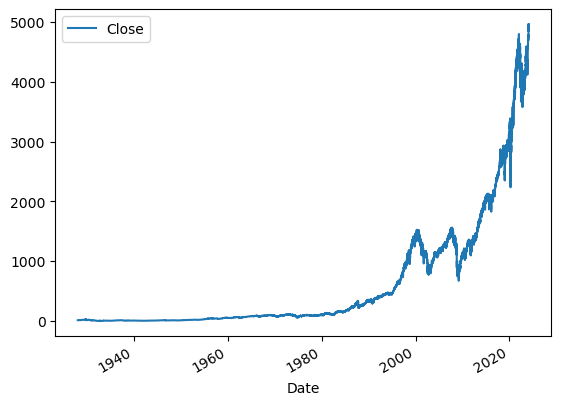

In [22]:
sp500.plot.line(y="Close", use_index=True)

In [23]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [24]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [26]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [27]:
sp500 = sp500.loc["1990-01-01":].copy()

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [30]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5625

In [31]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

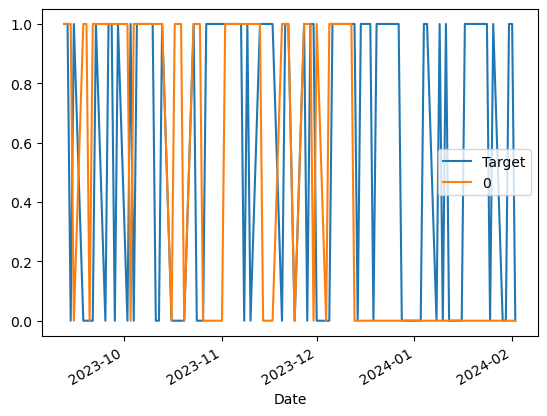

In [32]:
combined.plot()


In [33]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [34]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predicitons = [] #List of data frames. each data frame is a prediction for a single year  

    #Loop across our data year by year 
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy() #all of the years prior to the current year
        test = data.iloc[i:(i+step)].copy() #the current year
        predictions = predict(train, test, predictors, model) #generate predictions using function
        all_predicitons.append(predictions)
    return pd.concat(all_predicitons) #combine all in a single data frame

In [35]:
predictions = backtest(sp500, model, predictors)

In [36]:
predictions["Predictions"].value_counts()

0    3486
1    2602
Name: Predictions, dtype: int64

In [37]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5292083013066872

In [38]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.534658
0    0.465342
Name: Target, dtype: float64

In [41]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [42]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29 00:00:00-05:00,4892.950195,4929.310059,4887.399902,4927.930176,3525160000,4924.970215,0,1.003764,1.0,1.007913,4.0,1.061726,41.0,1.133463,138.0,1.232067,528.0
2024-01-30 00:00:00-05:00,4925.890137,4931.089844,4916.270020,4924.970215,3836130000,4845.649902,0,0.999700,1.0,1.004826,3.0,1.058476,40.0,1.131898,137.0,1.230836,528.0
2024-01-31 00:00:00-05:00,4899.189941,4906.750000,4845.149902,4845.649902,4696120000,4906.189941,1,0.991882,0.0,0.989567,2.0,1.039463,39.0,1.112925,136.0,1.210560,527.0


In [43]:
sp500 = sp500.dropna()

In [44]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-26 00:00:00-05:00,4888.910156,4906.689941,4881.470215,4890.970215,3353400000,4927.930176,1,0.999674,1.0,1.003535,4.0,1.056548,41.0,1.125904,137.0,1.223311,528.0
2024-01-29 00:00:00-05:00,4892.950195,4929.310059,4887.399902,4927.930176,3525160000,4924.970215,0,1.003764,1.0,1.007913,4.0,1.061726,41.0,1.133463,138.0,1.232067,528.0
2024-01-30 00:00:00-05:00,4925.890137,4931.089844,4916.270020,4924.970215,3836130000,4845.649902,0,0.999700,1.0,1.004826,3.0,1.058476,40.0,1.131898,137.0,1.230836,528.0
